In [ ]:
import torch
use_cuda = torch.cuda.is_available()
if use_cuda:
    device   = torch.device("cuda")
    print(torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")

Tesla T4


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving face-short.mp4 to face-short (2).mp4


In [ ]:
fnameLst = list(uploaded.keys())
fname = fnameLst[0]
print(fname)

face-short.mp4


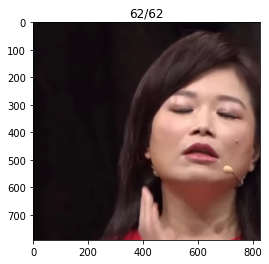

In [ ]:
# take a look at the input video
import cv2
import imageio
from IPython import display
import matplotlib.pyplot as plt

cap = cv2.VideoCapture(fname)
total_frames = int(cap.get(7))
vid = imageio.get_reader(fname, 'ffmpeg')
print('No. of frames = ', total_frames)
frame_count = 1
try:
  while(frame_count <= total_frames):
    display.clear_output(wait=True)
    plt.title(str(frame_count)+'/'+str(total_frames))
    frame = vid.get_data(frame_count)  # Capture frame-by-frame
    frame_count += 1
    plt.imshow(frame)
    plt.pause(0.1)
except:
    print("Read video error!")

https://github.com/codeniko/shape_predictor_81_face_landmarks

### 執行下一行前要上傳 shape_predictor_81_face_landmarks.dat 到 Colab

In [ ]:
import dlib
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_81_face_landmarks.dat")

In [ ]:
fname1 = fname + '_processed_video.mp4'

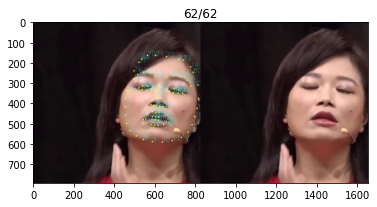

In [ ]:
import numpy as np
cap = cv2.VideoCapture(fname)
total_frames = int(cap.get(7))
print('No. of frames = ', total_frames)
cap.release()

vid = imageio.get_reader(fname, 'ffmpeg')
fps = vid.get_meta_data()['fps']
writer = imageio.get_writer(fname1, fps=fps)
frame_count = 1
try:
  while(frame_count <= total_frames):
    display.clear_output(wait=True)
    plt.title(str(frame_count)+'/'+str(total_frames))
    frame = vid.get_data(frame_count)  # Capture frame-by-frame
    img0 = np.copy(frame)
    faces = detector(frame)
    if(len(faces)>0):
      landmarks = predictor(frame, faces[0])  
      for n in range(landmarks.num_parts):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        cv2.circle(frame, (x, y), 2, (255, 255, 0), 2)
        cv2.putText(frame, str(n+1), (x, y), fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, fontScale=1, color=(0, 255, 255))
      img1 = np.append(frame, img0, axis=1) #把 2 張 img 接起來
      writer.append_data(img1)
    frame_count += 1
    plt.imshow(img1)
    plt.pause(0.1)
except:
  print("Read video error!")
writer.close()